In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.models import Sequential

In [4]:
data=pd.read_csv('train.csv')

In [7]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [11]:
x = data.iloc[:, 3:11].to_numpy()
y = data.iloc[:, -1].to_numpy()

In [16]:
y.shape

(1000,)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [18]:
print(x_train.shape,x_test.shape)

(700, 8) (300, 8)


In [21]:
print(y_train.shape,y_test.shape)

(700,) (300,)


In [23]:
# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Batch and shuffle the training data
train_dataset = train_dataset.shuffle(buffer_size=100).batch(32)
test_dataset = test_dataset.batch(32)


In [26]:
for s in train_dataset:
    print(s[0])

tf.Tensor(
[[     3  78945      1      2     14    177     73    123]
 [     3  88429      5      7     14    174     54     85]
 [     3 144945      2      1     12    192     78     97]
 [     4  95771      1      9     12    136     88    115]
 [     2  88420      2      7     15    173    119     72]
 [     4  52568      1      1     12    151     76     73]
 [     5 106474      3      2     12    197    115    115]
 [     4 123788      3     10      8    136     67    105]
 [     6 125638      1      9     15    143    101     94]
 [     7  70964      2     10     14    195     57     78]
 [     5 138414      4      6     14    155     79     87]
 [     3  67689      4      6     11    176     55    102]
 [     7  72730      1      9     11    183     94     73]
 [     7 113889      5      5     15    150     85     74]
 [     2 101958      2      7      8    135     58     84]
 [     3 101657      3      4     12    178     71    124]
 [     4 141405      4      2     10    197  

In [28]:
model=Sequential([
    InputLayer(input_shape=(8,)),
    Normalization(axis=(-1)),
    Dense(1)
])

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [30]:
history=model.fit(train_dataset,epochs=10,batch_size=32, validation_data=test_dataset)

Epoch 1/10
22/22 [==============================] - 1s 17ms/step - loss: 124947668992.0000 - mae: 333206.9375 - val_loss: 131975471104.0000 - val_mae: 343087.5000
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 123610775552.0000 - mae: 330980.3438 - val_loss: 130638979072.0000 - val_mae: 340930.9688
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 122287775744.0000 - mae: 328765.4062 - val_loss: 129316995072.0000 - val_mae: 338781.5938
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 120981340160.0000 - mae: 326549.7500 - val_loss: 128007127040.0000 - val_mae: 336635.7188
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 119687151616.0000 - mae: 324346.1562 - val_loss: 126716018688.0000 - val_mae: 334504.3750
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 118411542528.0000 - mae: 322153.6250 - val_loss: 125436420096.0000 - val_mae: 332375.8750
Epoch 7/10
22/22 [=========

In [31]:
loss,mae=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 120471330816.0000 - mae: 323956.3750


In [32]:
print(loss)

120471330816.0


In [33]:
print(mae)

323956.375


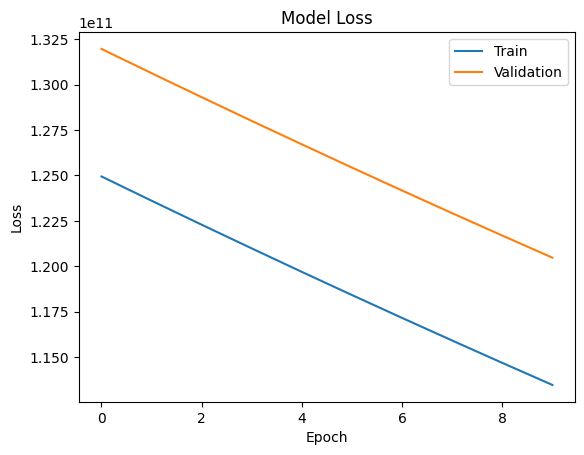

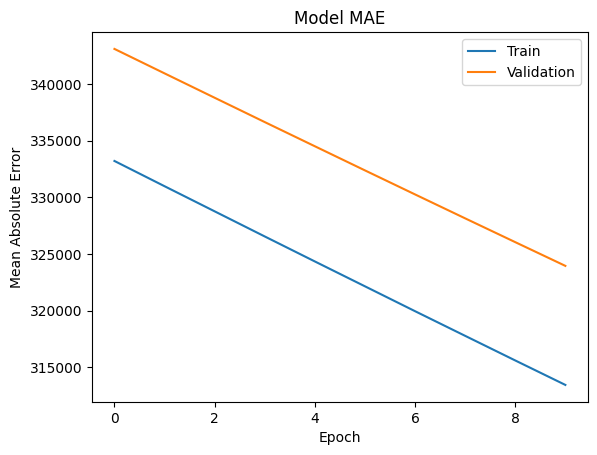

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])
plt.show()


In [35]:
# Save the model
model.save('my_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('my_model.h5')


In [36]:
# Example prediction
predictions = model.predict(x_test)
print(predictions)


10/10 [==============================] - 0s 2ms/step
[[ -8059.7734]
 [ -9230.808 ]
 [ -9280.739 ]
 [ -9951.826 ]
 [ -7288.8096]
 [ -3761.4062]
 [ -3732.297 ]
 [ -8543.368 ]
 [ -8233.297 ]
 [ -9700.716 ]
 [ -8442.02  ]
 [ -5757.503 ]
 [ -9544.905 ]
 [ -4390.567 ]
 [ -8735.614 ]
 [ -8436.7295]
 [ -8250.897 ]
 [ -6478.448 ]
 [ -8745.344 ]
 [ -9021.722 ]
 [-10050.413 ]
 [-10292.083 ]
 [ -8307.721 ]
 [ -6892.8804]
 [ -7371.133 ]
 [ -5199.124 ]
 [ -3835.4058]
 [ -6977.624 ]
 [ -3627.0715]
 [ -9304.383 ]
 [ -8892.27  ]
 [ -3771.4739]
 [ -7917.2896]
 [-10776.919 ]
 [ -3987.402 ]
 [ -6709.5767]
 [ -8375.361 ]
 [ -8244.555 ]
 [ -3844.2861]
 [ -4296.2   ]
 [ -6424.336 ]
 [-10205.687 ]
 [ -5261.83  ]
 [ -5183.308 ]
 [ -8986.874 ]
 [ -8259.256 ]
 [ -5089.1357]
 [ -7071.3496]
 [ -4079.5571]
 [ -7715.9507]
 [ -8928.845 ]
 [ -3819.745 ]
 [-10564.079 ]
 [ -4936.9346]
 [ -5940.706 ]
 [ -7755.881 ]
 [-10042.518 ]
 [-10438.176 ]
 [ -7076.178 ]
 [ -3803.0195]
 [ -5360.409 ]
 [-10440.2705]
 [ -9522.254 ]
 [

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
18/18 [==============================] - 1s 9ms/step - loss: 112648232960.0000 - mae: 312945.2188 - val_loss: 110745837568.0000 - val_mae: 304932.1875
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 111671451648.0000 - mae: 311181.2188 - val_loss: 109792837632.0000 - val_mae: 303142.6562
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 110692392960.0000 - mae: 309434.9688 - val_loss: 108855099392.0000 - val_mae: 301368.8438
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 109733339136.0000 - mae: 307676.5000 - val_loss: 107922587648.0000 - val_mae: 299591.9688
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 108775145472.0000 - mae: 305937.8750 - val_loss: 107006820352.0000 - val_mae: 297834.0938
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 107833344000.0000 - mae: 304211.3438 - val_loss: 106096730112.0000 - val_mae: 296074.1250
Epoch 7/50
18/18 [==========

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])


Epoch 1/50
18/18 [==============================] - 0s 10ms/step - loss: 74338123776.0000 - mae: 233666.6562 - val_loss: 74245767168.0000 - val_mae: 227655.5469
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 73771900928.0000 - mae: 232358.2812 - val_loss: 73715023872.0000 - val_mae: 226486.6562
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 73212321792.0000 - mae: 231068.7188 - val_loss: 73187778560.0000 - val_mae: 225314.6719
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 72655347712.0000 - mae: 229802.1875 - val_loss: 72674975744.0000 - val_mae: 224188.1562
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 72109047808.0000 - mae: 228569.5469 - val_loss: 72167809024.0000 - val_mae: 223082.3906
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 71566393344.0000 - mae: 227327.3281 - val_loss: 71668088832.0000 - val_mae: 221998.9844
Epoch 7/50
18/18 [=====================